In [3]:
#importing necessary libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for mathematical functions
pd.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.linear_model import LogisticRegression


In [4]:
#reading the dataset
df = pd.read_csv(r'D:\BOOKS\UNIPI\Sem 2\Data Mining 2\Project\Anomaly Detection\imdb_1.csv')
print(df.shape) #to check the shape of the dataset

(149531, 24)


In [5]:
df['totalNominations'] = df['totalNominations'].apply(lambda x: 1 if x >= 1 else 0)
df.drop(columns = ['titleType'], axis = 1, inplace = True)
y = df['totalNominations']

In [24]:
df['totalNominations'].value_counts()/len(df)

totalNominations
0    0.876394
1    0.123606
Name: count, dtype: float64

In [6]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df.drop(columns = ['totalNominations'], axis = 1))

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, stratify = y, test_size= 0.3, random_state = 42)

# DecisionTreeClassifier

In [7]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, class_weight=None)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.857757467677218
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92     39315
           1       0.43      0.46      0.44      5545

    accuracy                           0.86     44860
   macro avg       0.68      0.69      0.68     44860
weighted avg       0.86      0.86      0.86     44860



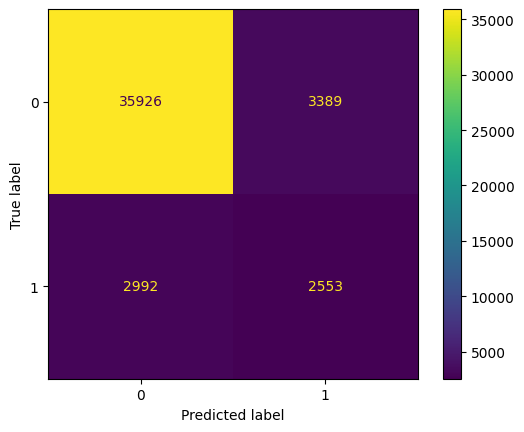

In [70]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=None,
    cmap='viridis'
)

In [76]:
#checking the feature importance
j = 0
for i in df.drop(['totalNominations'],axis = 1).columns:
    print(i, clf.feature_importances_[j])
    j+=1

startYear 0.1119092710277699
runtimeMinutes 0.08538381329264416
canHaveEpisodes 0.0036244372647901532
numRegions 0.15199186449514193
ratingCount 0.10877584676915589
castNumber 0.06892436270139383
companiesNumber 0.04098692833413594
averageRating 0.08863722090704336
writerCredits 0.025978839148976023
directorsCredits 0.014862394426910954
totalMedia 0.06541417602246496
totalReviews 0.039677570514627766
Asia 0.01891270919233274
Africa 0.002741979211165285
Europe 0.03999034804014357
North America 0.014047539523961863
South America 0.010018111423137443
Australia 0.0044040404187018455
Continent Unknown 0.009872591192569953
genre1 0.0447085581343958
genre2 0.03068168662271263
genre3 0.018455711335823917


In [77]:
from sklearn.utils.class_weight import compute_class_weight
# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))

print(class_weight_dict)

{0: 0.5705199621512728, 1: 4.045095493155873}


In [78]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, class_weight=class_weight_dict)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8633303611234954
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     39315
           1       0.45      0.43      0.44      5545

    accuracy                           0.86     44860
   macro avg       0.68      0.68      0.68     44860
weighted avg       0.86      0.86      0.86     44860



In [79]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, class_weight={0:0.1, 1:99}) # change the weights here
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8704190815871601
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93     39315
           1       0.47      0.42      0.45      5545

    accuracy                           0.87     44860
   macro avg       0.70      0.68      0.69     44860
weighted avg       0.86      0.87      0.87     44860



In [83]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, class_weight=None)
clf.fit(X_train, y_train)

# Get predicted probabilities
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Adjust threshold manually
threshold = 0.1  # threshold to detect more positives
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_adjusted)
report = classification_report(y_test, y_pred_adjusted)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.857757467677218
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92     39315
           1       0.43      0.46      0.44      5545

    accuracy                           0.86     44860
   macro avg       0.68      0.69      0.68     44860
weighted avg       0.86      0.86      0.86     44860



In [84]:
#Decision Trees are non-probabilistic models.
#Each leaf of a decision tree is "pure" (all samples are from one class), so it outputs 0% or 100% probability.
#Thus, adjusting the threshold on 0/1 won't help — because there’s no real uncertainty inside the tree.

for i in range(100):
    print(y_pred_proba[i])

0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0


# KNN
KNN itself does not use class weights inside because it's instance-based,
so you leave the training as normal:

In [86]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.885711101203745
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94     39315
           1       0.56      0.36      0.43      5545

    accuracy                           0.89     44860
   macro avg       0.74      0.66      0.69     44860
weighted avg       0.87      0.89      0.87     44860



In [98]:
# Get the predicted probabilities
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Adjust threshold manually
threshold = 0.7  # you can tune this
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_adjusted)
report = classification_report(y_test, y_pred_adjusted)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.8898796255015604
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     39315
           1       0.70      0.19      0.30      5545

    accuracy                           0.89     44860
   macro avg       0.80      0.59      0.62     44860
weighted avg       0.87      0.89      0.86     44860



In [88]:
y_pred_proba

array([0. , 0. , 0.8, ..., 0.6, 0.4, 0.2])

# XGBOOST

In [8]:
# Train XGBoost with class weight adjustment
model = xgb.XGBClassifier(
    scale_pos_weight=None,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

#Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9045920641997325
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     39315
           1       0.68      0.44      0.53      5545

    accuracy                           0.90     44860
   macro avg       0.80      0.70      0.74     44860
weighted avg       0.89      0.90      0.90     44860



In [9]:
neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)
scale_pos_weight = neg / pos

print(f"Scale pos weight: {scale_pos_weight}")

# Train XGBoost with class weight adjustment
model = xgb.XGBClassifier(
    scale_pos_weight=2, # change the weights here
    eval_metric='logloss'
)

model.fit(X_train, y_train)

#Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Scale pos weight: 7.090199412583089
Accuracy: 0.8957423094070441
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     39315
           1       0.58      0.59      0.58      5545

    accuracy                           0.90     44860
   macro avg       0.76      0.76      0.76     44860
weighted avg       0.90      0.90      0.90     44860



In [12]:
# Train XGBoost with class weight adjustment
model = xgb.XGBClassifier(
    scale_pos_weight=None, # change the weights here
    eval_metric='logloss'
)
model.fit(X_train, y_train)
# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Adjust threshold manually
threshold = 0.7  # threshold to detect more positives
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_adjusted)
report = classification_report(y_test, y_pred_adjusted)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.90100312082033
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     39315
           1       0.80      0.27      0.40      5545

    accuracy                           0.90     44860
   macro avg       0.85      0.63      0.67     44860
weighted avg       0.89      0.90      0.88     44860



In [13]:
y_pred_proba

array([0.01083739, 0.00278726, 0.76741534, ..., 0.12696758, 0.07125672,
       0.02828387], dtype=float32)

# LogisticRegression

In [17]:
lr = LogisticRegression(class_weight=None)
lr.fit(X_train, y_train)

# Get predicted probabilities
y_pred = lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8859786000891663
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     39315
           1       0.63      0.19      0.29      5545

    accuracy                           0.89     44860
   macro avg       0.76      0.59      0.61     44860
weighted avg       0.86      0.89      0.86     44860



In [19]:
lr = LogisticRegression(class_weight={0:0.1, 1:0.9}) #change the weights here
lr.fit(X_train, y_train)

# Get predicted probabilities
y_pred = lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7090726705305395
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.81     39315
           1       0.26      0.76      0.39      5545

    accuracy                           0.71     44860
   macro avg       0.61      0.73      0.60     44860
weighted avg       0.87      0.71      0.76     44860



In [20]:

# Train your model normally
model = LogisticRegression(class_weight=None) # change the weights here
model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Adjust threshold manually
threshold = 0.3  # for example, lower threshold to detect more positives
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_adjusted)
report = classification_report(y_test, y_pred_adjusted)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8769505127061971
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     39315
           1       0.50      0.32      0.39      5545

    accuracy                           0.88     44860
   macro avg       0.71      0.64      0.66     44860
weighted avg       0.86      0.88      0.86     44860

